In [1]:
import pandas as pd
df_all=pd.read_csv('diabetic_data_processed_withweight_short.csv',';')
print(type(df_all))
to_del = ['admission_source_id','encounter_id', 'patient_nbr','medical_specialty','payer_code','index','admission_type_id','discharge_disposition_id',
          'nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']        
print (to_del)
#Filter_selected cols
filtered_cols = [c for c in df_all.columns if (c not in to_del) ]#and ('ENF' not in c)
df_2 = df_all[filtered_cols]
print ("df_2",df_2.shape)

<class 'pandas.core.frame.DataFrame'>
['admission_source_id', 'encounter_id', 'patient_nbr', 'medical_specialty', 'payer_code', 'index', 'admission_type_id', 'discharge_disposition_id', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
df_2 (1000, 28)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
df_3 = df_2.fillna(value=np.mean(df_2,axis=0),inplace=False,axis=0).values
print ("df_3",df_3.shape)
print(df_2.columns)
X=df_3[:,0:-1]
y=df_3[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train=np.where(y_train > 0, 1, y_train)
y_test=np.where(y_test > 0, 1, y_test)
print(set(y_train))
print(set(y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

df_3 (1000, 28)
Index(['race', 'gender', 'age', 'weight', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed',
       'readmitted'],
      dtype='object')
{0.0, 1.0}
{0.0, 1.0}
(800, 27)
(200, 27)
(800,)
(200,)


In [3]:
from sklearn.preprocessing import StandardScaler
# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

In [4]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential
# Import `Dense` from `keras.layers`
from keras.layers import Dense
# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(27,)))
# Add one hidden layer 
model.add(Dense(8, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))
# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
model.get_config()
# List all weight tensors 
model.get_weights()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                336       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


[array([[-2.99813747e-01, -2.41434753e-01,  1.00635350e-01,
          1.95033699e-01, -1.90268606e-01,  1.43774480e-01,
         -1.31136537e-01, -3.32354873e-01,  2.89186925e-01,
          1.46226555e-01, -3.60939085e-01,  3.15752596e-01],
        [ 1.72788709e-01,  1.04840755e-01,  1.39448732e-01,
          2.53532261e-01, -7.39626884e-02,  5.34894466e-02,
          3.66115540e-01, -3.69542331e-01,  8.99985433e-02,
         -1.98359013e-01, -1.07311696e-01, -1.57881215e-01],
        [ 2.91534513e-01,  9.33217108e-02, -1.32932782e-01,
         -3.61008108e-01,  3.15217048e-01,  3.20311040e-01,
          2.01822907e-01,  2.72929758e-01,  2.74363488e-01,
         -1.90618038e-02,  2.93958485e-02, -7.45694041e-02],
        [-1.68591917e-01, -8.10776353e-02,  4.68067229e-02,
         -2.12085769e-01,  1.91050798e-01,  8.70805979e-03,
         -3.40751171e-01,  3.24458987e-01, -6.06631935e-02,
         -9.50243175e-02,  1.38703138e-01, -1.58543780e-01],
        [-3.41889918e-01,  1.9837835

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])            
model.fit(X_train, y_train,epochs=2, batch_size=1, verbose=1)

Epoch 1/2
800/800 [==============================] - 1s 922us/step - loss: 0.6777 - accuracy: 0.5738
Epoch 2/2
800/800 [==============================] - 1s 1ms/step - loss: 0.6461 - accuracy: 0.6200


In [6]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred.round()))
       
# Precision 
print("Precision: ",precision_score(y_test, y_pred.round()))

# Recall
print("Recall: ",recall_score(y_test, y_pred.round()))

# F1 score
print("F1score: ", f1_score(y_test,y_pred.round()))

7/7 [==============================] - 0s 1ms/step - loss: 0.6805 - accuracy: 0.6000
[0.6804577708244324, 0.6000000238418579]
[[37 52]
 [28 83]]
Precision:  0.6148148148148148
Recall:  0.7477477477477478
F1score:  0.6747967479674797


In [7]:
import shap
explainer = shap.Explainer(model, np.array(X_train), feature_names=df_2.columns)
shap_values = explainer(X)

Permutation explainer: 1001it [00:32, 23.10it/s]                                                                       


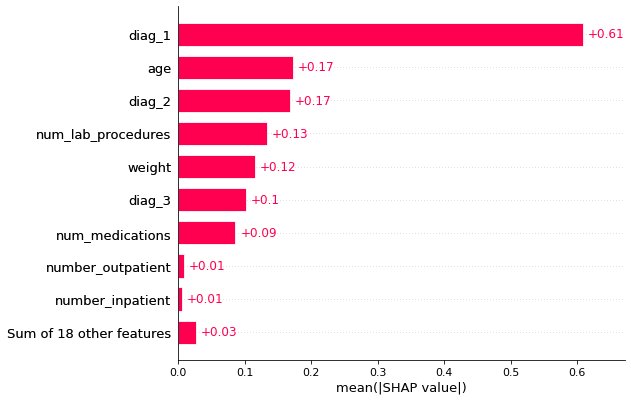

In [8]:
shap.plots.bar(shap_values)

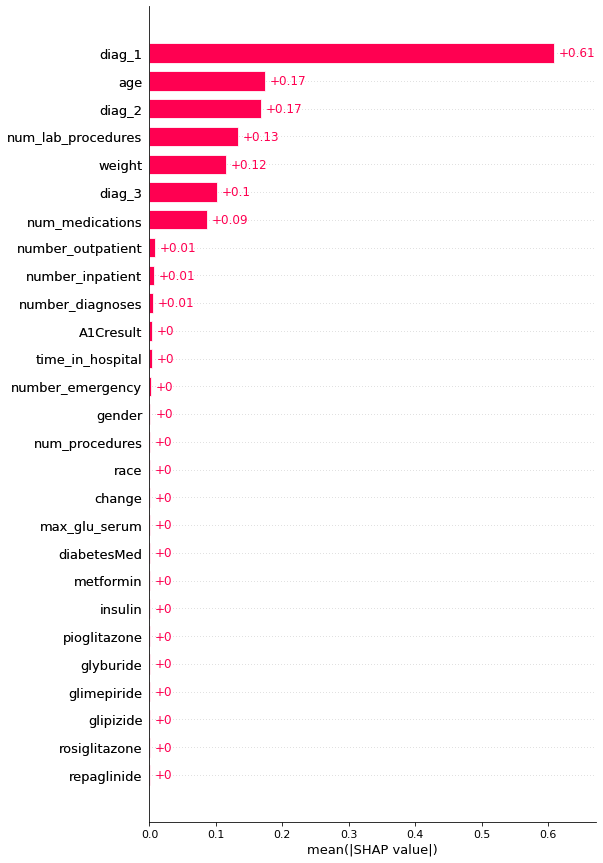

In [9]:
shap.plots.bar(shap_values, max_display=28)